In [19]:
import pandas as pd
import numpy as np
import fastf1 as ff1
import fastf1.plotting

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting


# Load FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False,
                          color_scheme='fastf1')

race = fastf1.get_session(2024, 'Italian', 'R')
race.load()
laps = race.laps.pick_quicklaps()

req         WARNING 	DEFAULT CACHE ENABLED! (11.69 GB) /Users/macbook/Library/Caches/fastf1
core           INFO 	Loading data for Italian Grand Prix - Race [v3.3.4]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track st

In [3]:
transformed_laps = laps.copy()
transformed_laps.loc[:, 'LapTime (s)'] = laps['LapTime'].dt.total_seconds()

In [6]:
team_order = (
    transformed_laps[['Team', 'LapTime (s)']].groupby('Team').median()['LapTime (s)'].sort_values().index
)
print(team_order)

Index(['McLaren', 'Mercedes', 'Ferrari', 'Red Bull Racing', 'Aston Martin',
       'Williams', 'Haas F1 Team', 'RB', 'Alpine', 'Kick Sauber'],
      dtype='object', name='Team')


In [26]:
team_median_pace = (
    transformed_laps[['Team', 'LapTime (s)']].groupby('Team').median()['LapTime (s)'].sort_values()
)
fastest = team_median_pace.min()
team_median_pace = team_median_pace.to_frame()

In [31]:
team_median_pace['Relative to Fastest'] = (team_median_pace['LapTime (s)'] / fastest * 100).round(3)

In [32]:
team_median_pace.head(10)

,LapTime (s),Relative to Fastest
Team,,
McLaren,83.5305,100.000
Mercedes,83.7680,100.284
Ferrari,83.7980,100.320
Red Bull Racing,84.0230,100.590
Aston Martin,84.8820,101.618
Williams,85.0050,101.765
Haas F1 Team,85.0370,101.804
RB,85.0470,101.816
Alpine,85.5640,102.434


In [17]:
team_palette = {team: fastf1.plotting.team_color(team)
                for team in team_order}

/var/folders/80/nwtb7gx54bg06b5y_lyjvwt40000gn/T/ipykernel_50642/1570718145.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


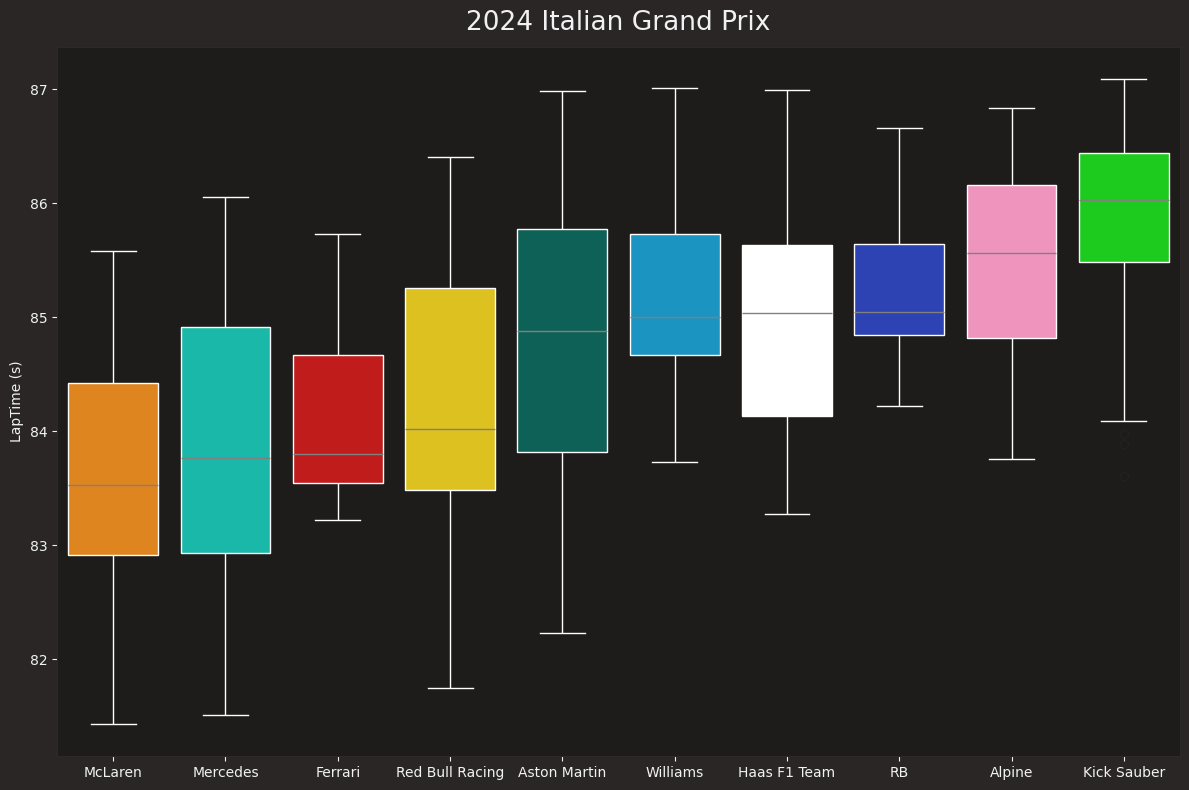

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(
    data = transformed_laps,
    x = 'Team',
    y = 'LapTime (s)',
    order = team_order,
    palette = team_palette,
    whiskerprops=dict(color="white"),
    boxprops=dict(edgecolor="white"),
    medianprops=dict(color="grey"),
    capprops=dict(color="white"),
)

plt.title("2024 Italian Grand Prix")
plt.grid(visible=False)

# x-label is redundant
ax.set(xlabel=None)
plt.tight_layout()
plt.show()

In [33]:
import fastf1
import pandas as pd

def calculate_season_pace(year, race_numbers):
    """
    Calculate the relative pace of F1 teams across a season and store the data in a DataFrame.
    
    :param year: The year of the F1 season.
    :param race_numbers: A list of race numbers to calculate the pace for.
    :return: A DataFrame containing the relative pace of teams for each race.
    """
    
    # Initialize an empty DataFrame to store the results
    season_pace = pd.DataFrame()
    
    for race_number in range(1, race_numbers+1):
        # Load the race session
        race = fastf1.get_session(year, race_number, 'R')
        race.load()
        
        # Extract and transform the laps data
        laps = race.laps.pick_quicklaps()
        transformed_laps = laps.copy()
        transformed_laps.loc[:, 'LapTime (s)'] = laps['LapTime'].dt.total_seconds()
        
        # Calculate the median pace for each team
        team_median_pace = (
            transformed_laps[['Team', 'LapTime (s)']]
            .groupby('Team')
            .median()['LapTime (s)']
            .sort_values()
        )
        
        # Calculate relative pace compared to the fastest team
        fastest = team_median_pace.min()
        team_median_pace = team_median_pace.to_frame()
        team_median_pace['Relative to Fastest'] = (team_median_pace['LapTime (s)'] / fastest * 100).round(3)
        
        # Add the race number to the DataFrame
        team_median_pace['Race'] = race_number
        
        # Append the results to the season DataFrame
        season_pace = pd.concat([season_pace, team_median_pace.reset_index()], ignore_index=True)
    
    return season_pace

In [36]:
season_pace = calculate_season_pace(2024, 16)

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.3.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '55', '16', '63', '4', '44', '81', '14', '18', '24', '20', '3', '22', '23', '27', '31', '10', '77', '2']
core           INFO 	Loading data for Saudi Arabian Grand Prix

In [46]:
season_pace.to_csv('2024_season_pace_UNTIL_R16.csv', index=False)

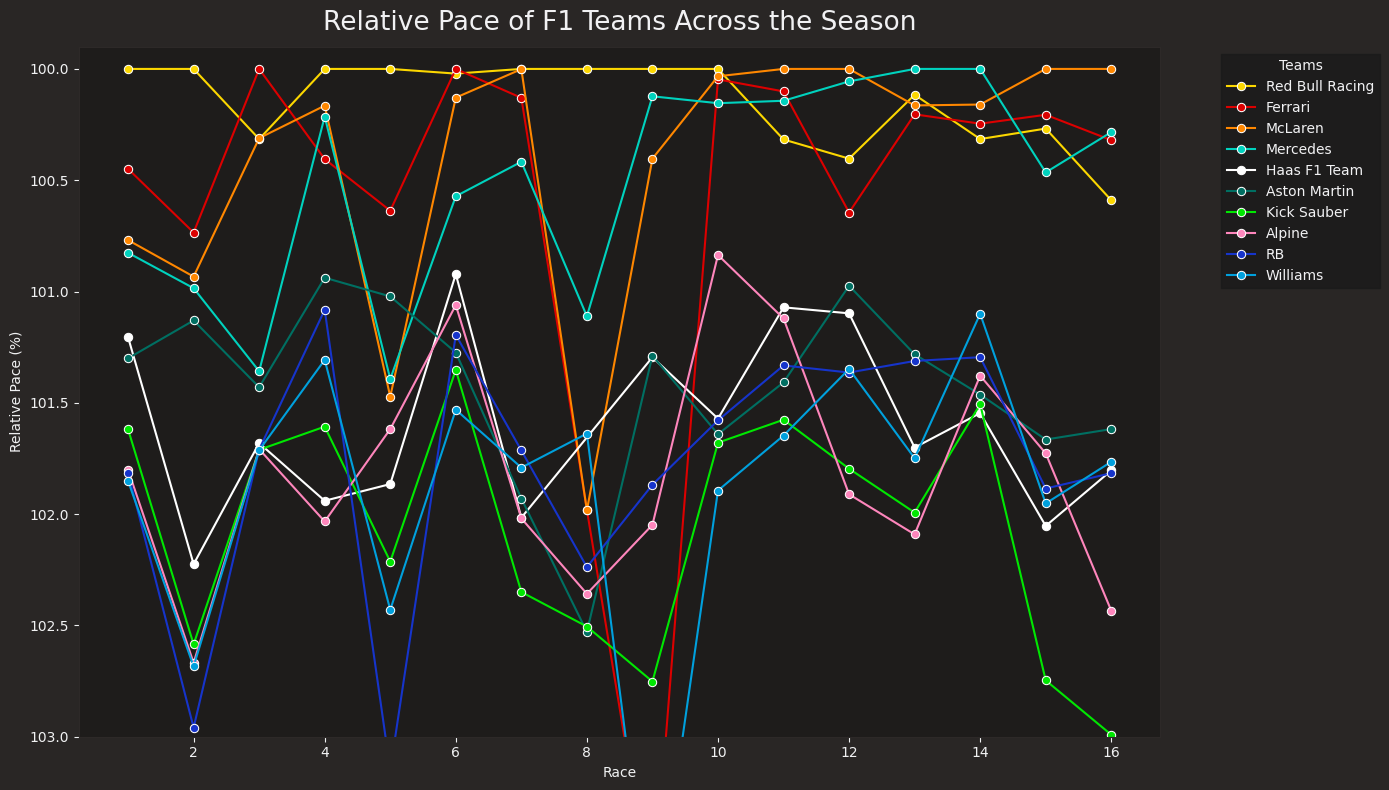

In [45]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=season_pace, x='Race', y='Relative to Fastest', hue='Team', palette=team_palette, marker="o")

# Invert the Y-axis to have 100% at the top
plt.gca().invert_yaxis()


plt.xlabel('Race')
plt.ylabel('Relative Pace (%)')
plt.title('Relative Pace of F1 Teams Across the Season')
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(103, 99.9)

plt.tight_layout()
plt.show()

In [ ]:
season2018_pace = calculate_season_pace(2018, 21)

In [51]:
team_palette_2018 = {team: fastf1.plotting.team_color(team) for team in season2018_pace['Team'].unique()}

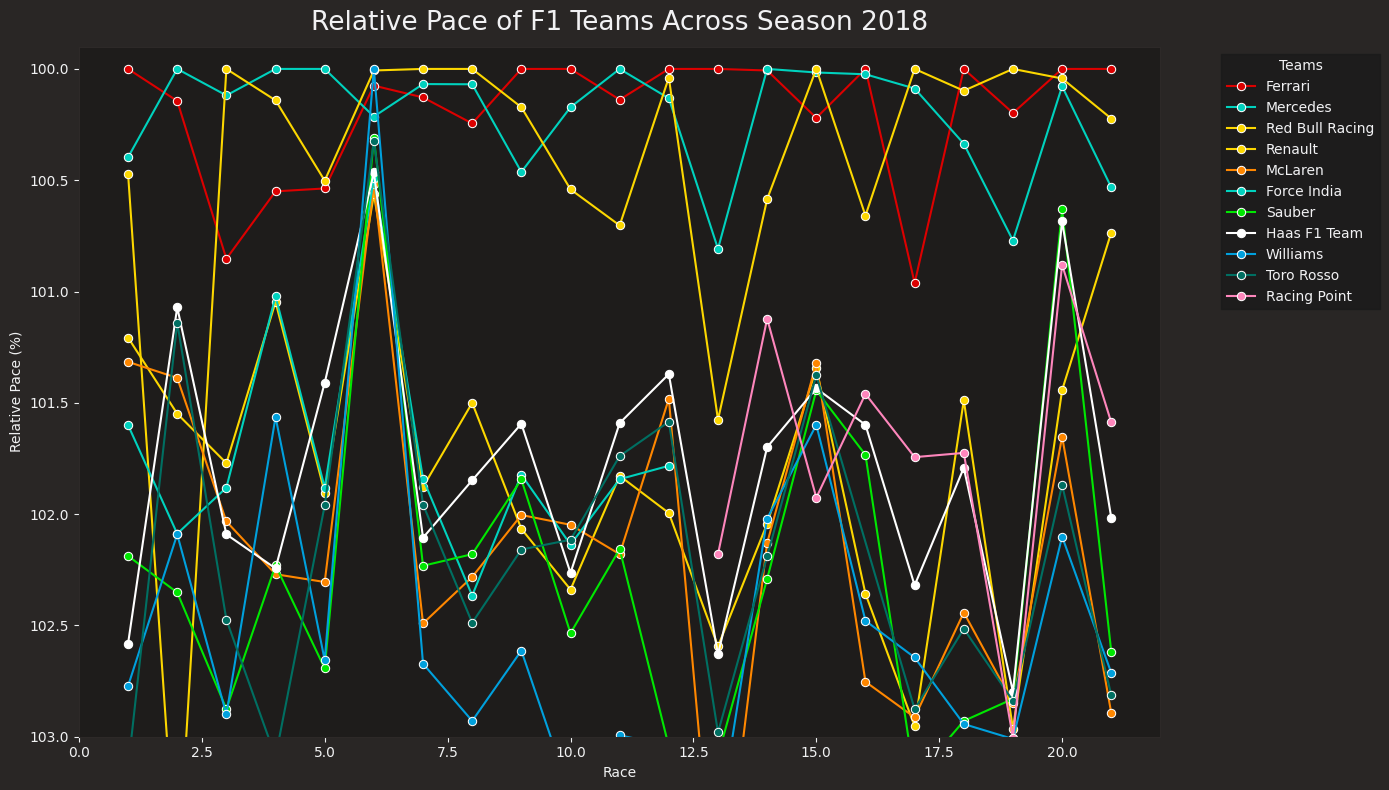

In [52]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=season2018_pace, x='Race', y='Relative to Fastest', hue='Team', palette=team_palette_2018, marker="o")

# Invert the Y-axis to have 100% at the top
plt.gca().invert_yaxis()


plt.xlabel('Race')
plt.ylabel('Relative Pace (%)')
plt.title('Relative Pace of F1 Teams Across Season 2018')
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(103, 99.9)

plt.tight_layout()
plt.show()

In [53]:
season2023_pace = calculate_season_pace(2023, 23)

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.3.4]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
Request for URL https://ergast.com/api/f1/2023/1/results.json failed; using cached response
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/requests_cache/session.py", line 260, in _resend
    response.raise_for_status()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/requests/models.py", line 1021, in raise_for_status
    raise HTTPError(http_error_msg, response=self)
requests.exceptions.HTTPError: 503 Server Error: Backend fetch failed for url: https://ergast.com/api/f1/2023/1/results.json
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using 

ValueError: Invalid round: 23

In [61]:
import pandas as pd

def calculate_season_pace_offline(race_data, year):
    """
    Calculate the relative pace of F1 teams across a season and store the data in a DataFrame.
    
    :param race_data: DataFrame object containing race data.
    :param year: int the season to do calculation for.
    :return: A DataFrame containing the relative pace of teams for each race.
    """
    
    # Initialize an empty DataFrame to store the results
    season_pace = pd.DataFrame()

    season_data = race_data[race_data['Year'] == year]
    season_data = season_data.sort_values(by=['LapStartDate'], ascending=True)
    season_data['Race'] = season_data.groupby('RaceName').ngroup() + 1    
    

    for race_number in range(1, season_data['Race'].max()+1):
       
        laps = season_data[season_data['Race'] == race_number]
        # Extract and transform the laps data
        max_allowed_lap = laps['LapTime'].min() * 1.07
        laps = laps[laps['LapTime'] <= max_allowed_lap]
        
        # Calculate the median pace for each team
        team_median_pace = (
            laps[['Team', 'LapTime']]
            .groupby('Team')
            .median()['LapTime']
            .sort_values()
        )
        
        # Calculate relative pace compared to the fastest team
        fastest = team_median_pace.min()
        team_median_pace = team_median_pace.to_frame()
        team_median_pace['Relative to Fastest'] = (team_median_pace['LapTime'] / fastest * 100).round(3)
        
        # Add the race number to the DataFrame
        team_median_pace['Race'] = race_number
        
        # Append the results to the season DataFrame
        season_pace = pd.concat([season_pace, team_median_pace.reset_index()], ignore_index=True)
    
    return season_pace

In [57]:
race_data = pd.read_csv("race_data/race_data_2018_2023.csv")
race_data.info()

/var/folders/80/nwtb7gx54bg06b5y_lyjvwt40000gn/T/ipykernel_50642/3725306688.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  race_data = pd.read_csv("race_data/race_data_2018_2023.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136062 entries, 0 to 136061
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Time                136062 non-null  object 
 1   Driver              136062 non-null  object 
 2   DriverNumber        136062 non-null  int64  
 3   LapTime             133354 non-null  float64
 4   LapNumber           136062 non-null  float64
 5   Stint               135719 non-null  float64
 6   PitOutTime          4367 non-null    float64
 7   PitInTime           4513 non-null    float64
 8   Sector1Time         133111 non-null  float64
 9   Sector2Time         135757 non-null  float64
 10  Sector3Time         135625 non-null  float64
 11  Sector1SessionTime  132789 non-null  object 
 12  Sector2SessionTime  135757 non-null  object 
 13  Sector3SessionTime  135625 non-null  object 
 14  SpeedI1             116594 non-null  float64
 15  SpeedI2             135705 non-nul

In [62]:
season2023_pace = calculate_season_pace_offline(race_data, 2023)

In [71]:
team_palette_2023 = team_palette.copy()
team_palette_2023['AlphaTauri'] = team_palette['RB']
team_palette_2023['Alfa Romeo'] = fastf1.plotting.team_color('Alfa Romeo')

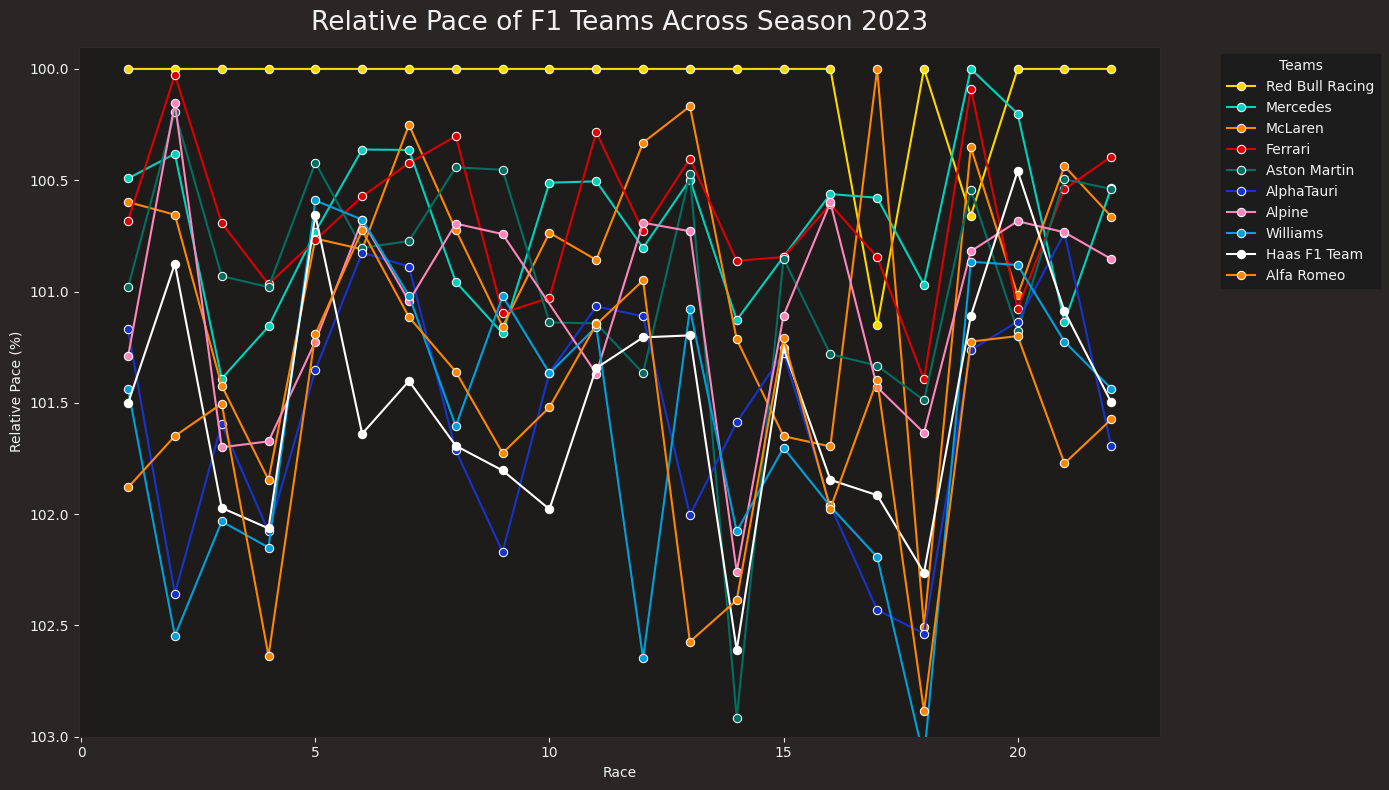

In [72]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=season2023_pace, x='Race', y='Relative to Fastest', hue='Team', palette=team_palette_2023, marker="o")

# Invert the Y-axis to have 100% at the top
plt.gca().invert_yaxis()


plt.xlabel('Race')
plt.ylabel('Relative Pace (%)')
plt.title('Relative Pace of F1 Teams Across Season 2023')
plt.legend(title='Teams', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(103, 99.9)

plt.tight_layout()
plt.show()